# Title: Personalized Health Guidance System with Machine Learning

# Data preprocessing

In [47]:
import pandas as pd
import re

# Step 1: Read the dataset
dataset = pd.read_csv('Training.csv')

# Step 2: Clean the 'prognosis' column — keep only letters, spaces, and round brackets,
# capitalize only the first letter of every word, and remove extra spaces in a separate loop.
def clean_text(text):
    # Extract allowed characters: letters, spaces, and round brackets
    dis = ' '.join(re.findall(r'[A-Za-z() ]+', text)).strip()

    # Convert the string to a list to allow modification
    dis_list = list(dis)

    # Loop to capitalize first letter of each word
    for i, c in enumerate(dis_list):
        if i == 0:
            dis_list[i] = c.upper()
        elif dis_list[i-1] == ' ' and c != '(':
            dis_list[i] = c.upper()
        elif dis_list[i-1] == '(':
            dis_list[i] = c.upper()

    # Second loop to remove consecutive spaces
    cleaned_list = []
    for i in range(len(dis_list)):
        if i == 0 or not (dis_list[i] == ' ' and dis_list[i-1] == ' '):
            cleaned_list.append(dis_list[i])

    cleaned_text = ''.join(cleaned_list)

    # Direct corrections
    if cleaned_text == "Peptic Ulcer Diseae":
        return "Peptic Ulcer Disease"
    if cleaned_text == "Osteoarthristis":
        return "Osteoarthritis"
    if cleaned_text == "(Vertigo) Paroymsal Positional Vertigo":
        return "Paroxysmal Positional Vertigo"
    if cleaned_text == "Dimorphic Hemmorhoids(Piles)":
        return "Dimorphic Hemorrhoids (Piles)"
    if cleaned_text == "UTI":
        return "Urinary Tract Infection"
    if cleaned_text == "Chicken Pox":
        return "Chickenpox"
    if cleaned_text == "COVID Like Illness":
        return "COVID-Like Illness"

    return cleaned_text

def clean_column_name(column):

    if column == "fluid_overload.1":
        print("running")
        return "fluid_overload"

    column = ' '.join(re.findall(r'[A-Za-z_() ]+', column)).strip()

    # Fix known issues
    if column == "spotting_ urination":
        return "spotting_urination"
    if column == "dischromic _patches":
        return "dischromic_patches"
    if column == "foul_smell_of urine":
        return "foul_smell_of_urine"
    if column == "swollen_extremeties":
        return "swollen_extremities"
    if column == "scurring":
        return "scarring"
    if column == "cold_hands_and_feets":
        return "cold_hands_and_feet"
    if column == "swelled_lymph_nodes":
        return "swollen_lymph_nodes"


    return column  # Return unchanged if no fix needed

# Apply the function to column headers
dataset.columns = [clean_column_name(col) for col in dataset.columns]

# Apply the function to last column
dataset['prognosis'] = dataset['prognosis'].astype(str).apply(clean_text)

# Apply the function to the 'prognosis' column

# Step 3: Save to a new CSV file
dataset.to_csv('Training_cleaned.csv', index=False)

print("Cleaned dataset saved as 'Training_cleaned.csv'")


running
Cleaned dataset saved as 'Training_cleaned.csv'


# Load libraries & dataset  

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
dataset = pd.read_csv('Training_cleaned.csv')

# Dataset Statistics

In [50]:
dataset.shape

(6320, 133)

In [51]:
dataset.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scarring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal Infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal Infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal Infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal Infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal Infection


In [52]:
symptoms = list(dataset.columns.unique())
symptoms.remove("prognosis")

print("Total Symptoms Accepted : ", len(symptoms), "\n")
print(symptoms)

Total Symptoms Accepted :  132 

['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feet', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swollen_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fas

In [53]:
# Identifiable Dieseases

prognosis_values = dataset['prognosis'].unique()

print("Total Identifiable Dieseases : ", prognosis_values.size, "\n")
print(prognosis_values)

Total Identifiable Dieseases :  60 

['Fungal Infection' 'Allergy' 'GERD' 'Chronic Cholestasis' 'Drug Reaction'
 'Peptic Ulcer Disease' 'AIDS' 'Diabetes' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension' 'Migraine' 'Cervical Spondylosis'
 'Paralysis (Brain Hemorrhage)' 'Jaundice' 'Malaria' 'Chickenpox' 'Dengue'
 'Typhoid' 'Hepatitis A' 'Hepatitis B' 'Hepatitis C' 'Hepatitis D'
 'Hepatitis E' 'Alcoholic Hepatitis' 'Tuberculosis' 'Common Cold'
 'Pneumonia' 'Dimorphic Hemorrhoids (Piles)' 'Heart Attack'
 'Varicose Veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthritis' 'Arthritis' 'Paroxysmal Positional Vertigo' 'Acne'
 'Urinary Tract Infection' 'Psoriasis' 'Impetigo' 'Fever' 'Headache'
 'Muscle Fatigue' 'Flu' 'Food Poisoning' 'COVID-Like Illness' 'Sinusitis'
 'Allergic Rhinitis' 'Strep Throat' 'Tonsillitis' 'Anemia' 'Bronchitis'
 'Dehydration' 'Heat Exhaustion' 'Insomnia' 'Anxiety Disorder'
 'Food Allergy' 'Lactose Intolerance' 'Acid Reflux']


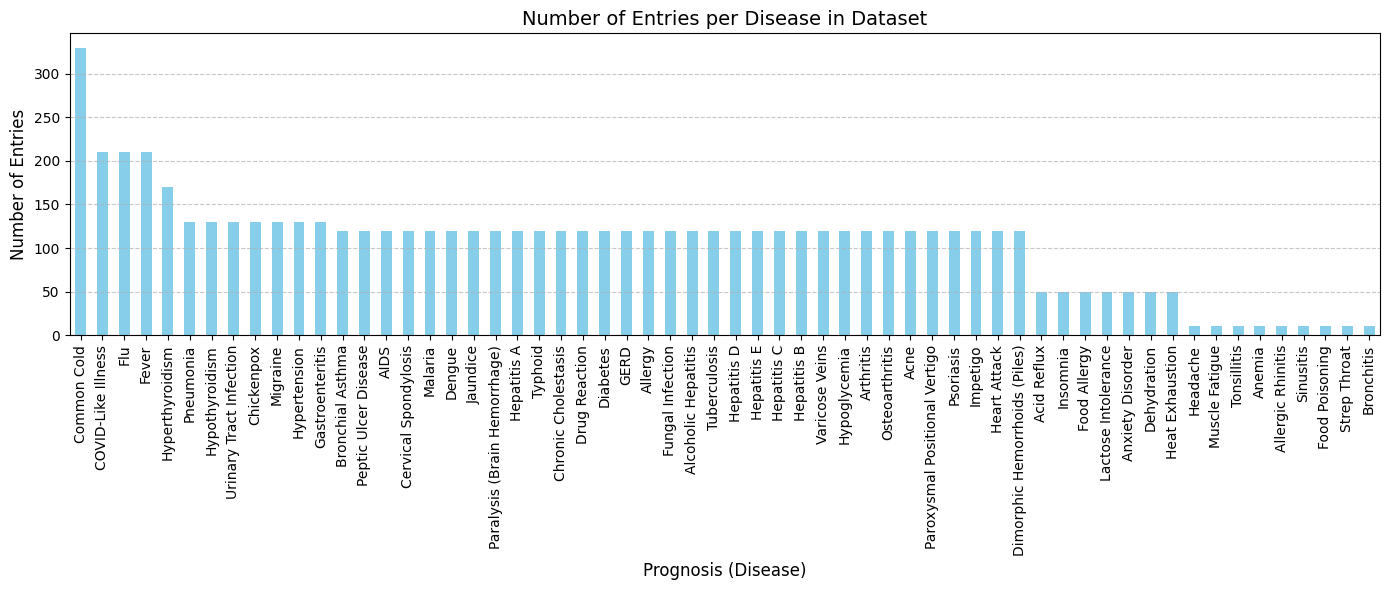

In [54]:
# Plotting the frequency distribution of diseases

# Count the number of entries for each prognosis
prognosis_counts = dataset['prognosis'].value_counts().sort_values(ascending=False)

# Plotting the counts
plt.figure(figsize=(14, 6))
prognosis_counts.plot(kind='bar', color='skyblue')
plt.xlabel("Prognosis (Disease)", fontsize=12)
plt.ylabel("Number of Entries", fontsize=12)
plt.title("Number of Entries per Disease in Dataset", fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Train-Test Split

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [56]:
X = dataset.drop('prognosis', axis=1)
y = dataset['prognosis']

# encoding prognonsis from disease names to integer values
le = LabelEncoder()
le.fit(y)
Y = le.transform(y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

In [57]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (5056, 132)
Shape of X_test:  (1264, 132)
Shape of Y_train:  (5056,)
Shape of Y_test:  (1264,)


In [58]:
X_train

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scarring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
5541,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3688,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0
2271,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5910,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3915,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1428,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
X_test

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scarring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
4705,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5181,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2126,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
900,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1474,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6272,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4799,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4322,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2486,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
Y_train

array([21, 33, 36, ..., 31, 33, 33])

In [61]:
Y_test

array([39, 30, 18, ..., 17, 15,  0])

# Training Multiple Models

In [62]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix


# Create a dictionary to store models
models = {
    'SVC': SVC(kernel='linear'),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'KNeighbors': KNeighborsClassifier(n_neighbors=3),
    'MultinomialNB': MultinomialNB()
}

# Loop through the models, train, test, and print results
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)

    # Test the model
    predictions = model.predict(X_test)
    predictions_train = model.predict(X_train)

    # Calculate accuracy
    accuracy = accuracy_score(Y_test, predictions)
    accuracy_train = accuracy_score(Y_train, predictions_train)
    print(f"{model_name} Accuracy: {accuracy}")
    print(f"{model_name} Accuracy On Training: {accuracy_train}")

    # Calculate confusion matrix
    cm = confusion_matrix(Y_test, predictions)
    print(f"{model_name} Confusion Matrix:")
    print(np.array2string(cm, separator=', '))

    # Line break
    print("\n" + "="*40 + "\n")


SVC Accuracy: 0.9849683544303798
SVC Accuracy On Training: 0.9877373417721519
SVC Confusion Matrix:
[[26,  0,  0, ...,  0,  0,  0],
 [ 0,  9,  0, ...,  0,  0,  0],
 [ 0,  0, 22, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 22,  0,  0],
 [ 0,  0,  0, ...,  0, 27,  0],
 [ 0,  0,  0, ...,  0,  0, 28]]


RandomForest Accuracy: 0.9857594936708861
RandomForest Accuracy On Training: 0.9877373417721519
RandomForest Confusion Matrix:
[[26,  0,  0, ...,  0,  0,  0],
 [ 0,  9,  0, ...,  0,  0,  0],
 [ 0,  0, 22, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 22,  0,  0],
 [ 0,  0,  0, ...,  0, 27,  0],
 [ 0,  0,  0, ...,  0,  0, 28]]


GradientBoosting Accuracy: 0.9620253164556962
GradientBoosting Accuracy On Training: 0.9649920886075949
GradientBoosting Confusion Matrix:
[[26,  0,  0, ...,  0,  0,  0],
 [ 0,  9,  0, ...,  0,  0,  0],
 [ 0,  0, 22, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 22,  0,  0],
 [ 0,  0,  0, ...,  0, 27,  0],
 [ 0,  0,  0, ...,  0,  0, 28]]


KNeighbors Accuracy: 0.98655063291

In [63]:
import pickle

# Loop through your models dictionary and save each model with the algorithm's name
for model_name, model in models.items():
    filename = f"{model_name}.pkl"
    with open(filename, "wb") as file:
        pickle.dump(model, file)
    print(f"Saved {model_name} to {filename}")


Saved SVC to SVC.pkl
Saved RandomForest to RandomForest.pkl
Saved GradientBoosting to GradientBoosting.pkl
Saved KNeighbors to KNeighbors.pkl
Saved MultinomialNB to MultinomialNB.pkl


In [64]:
symptoms_dict = {col: idx for idx, col in enumerate(dataset.columns)}
del symptoms_dict["prognosis"]
diseases_list = {
    int(key): value for key, value in zip(le.transform(le.classes_), le.classes_)
}

In [65]:
symptoms_dict

{'itching': 0,
 'skin_rash': 1,
 'nodal_skin_eruptions': 2,
 'continuous_sneezing': 3,
 'shivering': 4,
 'chills': 5,
 'joint_pain': 6,
 'stomach_pain': 7,
 'acidity': 8,
 'ulcers_on_tongue': 9,
 'muscle_wasting': 10,
 'vomiting': 11,
 'burning_micturition': 12,
 'spotting_urination': 13,
 'fatigue': 14,
 'weight_gain': 15,
 'anxiety': 16,
 'cold_hands_and_feet': 17,
 'mood_swings': 18,
 'weight_loss': 19,
 'restlessness': 20,
 'lethargy': 21,
 'patches_in_throat': 22,
 'irregular_sugar_level': 23,
 'cough': 24,
 'high_fever': 25,
 'sunken_eyes': 26,
 'breathlessness': 27,
 'sweating': 28,
 'dehydration': 29,
 'indigestion': 30,
 'headache': 31,
 'yellowish_skin': 32,
 'dark_urine': 33,
 'nausea': 34,
 'loss_of_appetite': 35,
 'pain_behind_the_eyes': 36,
 'back_pain': 37,
 'constipation': 38,
 'abdominal_pain': 39,
 'diarrhoea': 40,
 'mild_fever': 41,
 'yellow_urine': 42,
 'yellowing_of_eyes': 43,
 'acute_liver_failure': 44,
 'fluid_overload': 45,
 'swelling_of_stomach': 46,
 'swollen_

In [66]:
diseases_list

{0: 'AIDS',
 1: 'Acid Reflux',
 2: 'Acne',
 3: 'Alcoholic Hepatitis',
 4: 'Allergic Rhinitis',
 5: 'Allergy',
 6: 'Anemia',
 7: 'Anxiety Disorder',
 8: 'Arthritis',
 9: 'Bronchial Asthma',
 10: 'Bronchitis',
 11: 'COVID-Like Illness',
 12: 'Cervical Spondylosis',
 13: 'Chickenpox',
 14: 'Chronic Cholestasis',
 15: 'Common Cold',
 16: 'Dehydration',
 17: 'Dengue',
 18: 'Diabetes',
 19: 'Dimorphic Hemorrhoids (Piles)',
 20: 'Drug Reaction',
 21: 'Fever',
 22: 'Flu',
 23: 'Food Allergy',
 24: 'Food Poisoning',
 25: 'Fungal Infection',
 26: 'GERD',
 27: 'Gastroenteritis',
 28: 'Headache',
 29: 'Heart Attack',
 30: 'Heat Exhaustion',
 31: 'Hepatitis A',
 32: 'Hepatitis B',
 33: 'Hepatitis C',
 34: 'Hepatitis D',
 35: 'Hepatitis E',
 36: 'Hypertension',
 37: 'Hyperthyroidism',
 38: 'Hypoglycemia',
 39: 'Hypothyroidism',
 40: 'Impetigo',
 41: 'Insomnia',
 42: 'Jaundice',
 43: 'Lactose Intolerance',
 44: 'Malaria',
 45: 'Migraine',
 46: 'Muscle Fatigue',
 47: 'Osteoarthritis',
 48: 'Paralysis 

In [67]:
def get_predicted_value(patient_symptoms):
    # print("symptom: " ,patient_symptoms)
    input_vector = np.zeros(len(symptoms_dict))
    for item in patient_symptoms:
        if item not in symptoms_dict:
            print(f"❌ Invalid symcptom: '{item}' — not found in symptoms_dict")
        else:
            # print(f"symptom {item} is index {symptoms_dict[item]}" )
            input_vector[symptoms_dict[item]] = 1
    input_df = pd.DataFrame([input_vector], columns=symptoms_dict.keys())

    svc1 = models['SVC'].predict(input_df)[0]
    rf1 = models['RandomForest'].predict(input_df)[0]
    gb1 = models['GradientBoosting'].predict(input_df)[0]
    knn1 = models['KNeighbors'].predict(input_df)[0]
    mnb1 = models['MultinomialNB'].predict(input_df)[0]

    svc = diseases_list[models['SVC'].predict(input_df)[0]]
    rf = diseases_list[models['RandomForest'].predict(input_df)[0]]
    gb = diseases_list[models['GradientBoosting'].predict(input_df)[0]]
    knn = diseases_list[models['KNeighbors'].predict(input_df)[0]]
    mnb = diseases_list[models['MultinomialNB'].predict(input_df)[0]]
    # print("predict disease: " , [svc1, rf1, gb1, knn1, mnb1])
    # print("predict disease: " , [svc, rf, gb, knn, mnb])

    predictions = [knn1, svc1, rf1]
    final_prediction = None
    max_count = 0
    for prediction in predictions:
        count = predictions.count(prediction)
        if count > max_count:
            max_count = count
            final_prediction = prediction
    return final_prediction

# symptoms = input("Enter your symptoms.......")
# user_symptoms = [s.strip() for s in symptoms.split(',')]
# # Remove any extra characters, if any
# user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
# predicted_disease = get_predicted_value(user_symptoms)

# print("predict disease: " , predicted_disease)


In [68]:
correct = 0
total = len(X_test)

for i in range(total):
    # Extract the i-th row
    symptoms_row = X_test.iloc[i]

    symptoms_present = symptoms_row[symptoms_row == 1].index.tolist()

    # Get the true label (as string) from encoded label
    true_label_index = Y_test[i]
    true_label = diseases_list[true_label_index]

    predicted_label = diseases_list[get_predicted_value(symptoms_present)]

    # print("pred:", predicted_label )
    # print("true:", true_label )
    if predicted_label == true_label:
        correct += 1

accuracy = correct / total
print(f"Majority Voting Accuracy: {accuracy * 100}%")


Majority Voting Accuracy: 98.57594936708861%
